# Chess Progression Analysis

This notebook analyzes how your chess playing style and capabilities have evolved over time.

## Features:
- Rating progression tracking
- Accuracy improvement trends
- Tactical skill development
- Opening repertoire evolution
- Playing style changes
- Consistency metrics
- Personalized improvement recommendations

## Setup

Import libraries and initialize the progression analysis components.

In [1]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Add src and config directories to path
sys.path.append('../src')
sys.path.append('../config')
sys.path.append('..')

# Import our custom modules
from src.analyzers.progression_analyzer import ProgressionAnalyzer
from src.visualizers.progression_visualizer import ProgressionVisualizer
from config.settings import Config

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📁 Working directory: {os.getcwd()}")

✅ Libraries imported successfully!
📁 Working directory: /Users/martinhynie/Documents/GitHub/chessAnalysit/notebooks


## Configuration

Set up your Chess.com username and load your parsed games data.

In [2]:
# Configuration
USERNAME = "vds4321"  # Your Chess.com username

# Load parsed games data
parsed_games_path = os.path.join(Config.PROCESSED_DATA_DIR, "parsed_games.json")

if os.path.exists(parsed_games_path):
    with open(parsed_games_path, 'r') as f:
        parsed_games = json.load(f)
    print(f"✅ Loaded {len(parsed_games)} parsed games")
else:
    print("❌ No parsed games found. Please run the main analysis notebook first.")
    parsed_games = []

✅ Loaded 585 parsed games


## Step 1: Initialize Progression Analysis

Set up the progression analyzer and run the comprehensive analysis.

In [3]:
# Initialize progression analyzer and visualizer
progression_analyzer = ProgressionAnalyzer()
progression_visualizer = ProgressionVisualizer()

print("🔄 Analyzing your chess progression over time...")
print("This may take a moment to process all your games...")

try:
    # Analyze progression
    progression_data = progression_analyzer.analyze_progression(parsed_games)
    
    if progression_data:
        print("✅ Progression analysis completed!")
        print(f"📊 Analyzed {len(parsed_games)} games for progression trends")
    else:
        print("❌ Unable to generate progression analysis")
        
except Exception as e:
    print(f"❌ Error in progression analysis: {e}")
    progression_data = None

🔄 Analyzing your chess progression over time...
This may take a moment to process all your games...
✅ Progression analysis completed!
📊 Analyzed 585 games for progression trends


## Step 2: Progression Summary

Display key insights from your chess development.

In [4]:
if progression_data:
    # Display key insights
    summary = progression_data.get('summary', {})
    if summary:
        print(f"📊 PROGRESSION SUMMARY:")
        print("=" * 50)
        print(f"Overall Trend: {summary.get('overall_trend', 'unknown').replace('_', ' ').title()}")
        
        key_insights = summary.get('key_insights', [])
        if key_insights:
            print(f"\n✅ Key Improvements:")
            for insight in key_insights:
                print(f"   • {insight}")
        
        areas_needing_work = summary.get('areas_needing_work', [])
        if areas_needing_work:
            print(f"\n⚠️ Areas Needing Work:")
            for area in areas_needing_work:
                print(f"   • {area}")
    
    # Rating progression details
    rating_data = progression_data.get('rating_progression', {})
    if rating_data:
        print(f"\n📈 RATING PROGRESSION:")
        print("=" * 30)
        print(f"Starting Rating: {rating_data.get('starting_rating', 0)}")
        print(f"Current Rating: {rating_data.get('current_rating', 0)}")
        print(f"Peak Rating: {rating_data.get('peak_rating', 0)}")
        print(f"Total Gain: {rating_data.get('total_gain', 0):+d} points")
        print(f"Trend: {rating_data.get('trend_direction', 'stable').title()}")
        print(f"Rating Volatility: {rating_data.get('rating_volatility', 0):.1f}")
    
    # Accuracy trends
    accuracy_data = progression_data.get('accuracy_trends', {})
    if accuracy_data:
        print(f"\n🎯 ACCURACY EVOLUTION:")
        print("=" * 30)
        print(f"Starting Accuracy: {accuracy_data.get('starting_accuracy', 0):.1f}%")
        print(f"Current Accuracy: {accuracy_data.get('current_accuracy', 0):.1f}%")
        print(f"Improvement: {accuracy_data.get('accuracy_improvement', 0):+.1f}%")
        print(f"Best Game Accuracy: {accuracy_data.get('best_accuracy', 0):.1f}%")
        print(f"Consistency Score: {accuracy_data.get('consistency', 0):.1f}%")
    
    # Tactical improvement
    tactical_data = progression_data.get('tactical_improvement', {})
    if tactical_data:
        print(f"\n⚔️ TACTICAL DEVELOPMENT:")
        print("=" * 30)
        error_improvement = tactical_data.get('error_rate_improvement', 0)
        vision_improvement = tactical_data.get('tactical_vision_improvement', 0)
        
        if error_improvement > 0:
            print(f"Error Rate Reduced by: {error_improvement:.1f} per game")
        elif error_improvement < 0:
            print(f"Error Rate Increased by: {abs(error_improvement):.1f} per game")
        else:
            print("Error Rate: Stable")
        
        if vision_improvement > 0:
            print(f"Missed Tactics Reduced by: {vision_improvement:.1f} per game")
        elif vision_improvement < 0:
            print(f"Missed Tactics Increased by: {abs(vision_improvement):.1f} per game")
        else:
            print("Tactical Vision: Stable")
        
        print(f"Tactical Consistency: {tactical_data.get('tactical_consistency', 0):.1f}%")
    
    # Opening evolution
    opening_data = progression_data.get('opening_evolution', {})
    if opening_data:
        print(f"\n📚 OPENING REPERTOIRE EVOLUTION:")
        print("=" * 40)
        expansion = opening_data.get('repertoire_expansion', 0)
        
        if expansion > 0:
            print(f"Repertoire Expanded by: {expansion} openings")
        elif expansion < 0:
            print(f"Repertoire Narrowed by: {abs(expansion)} openings")
        else:
            print("Repertoire Size: Stable")
        
        print(f"Early Diversity: {opening_data.get('early_diversity', 0)} openings")
        print(f"Current Diversity: {opening_data.get('recent_diversity', 0)} openings")
        
        new_openings = opening_data.get('new_openings', [])
        if new_openings:
            print(f"New Openings Added: {', '.join(new_openings[:3])}")
            if len(new_openings) > 3:
                print(f"   ...and {len(new_openings) - 3} more")
        
        abandoned = opening_data.get('abandoned_openings', [])
        if abandoned:
            print(f"Openings Dropped: {', '.join(abandoned[:3])}")
        
        # Most improved/declined openings
        most_improved = opening_data.get('most_improved_opening')
        if most_improved:
            print(f"Most Improved Opening: {most_improved[0]} (+{most_improved[1]:.1f}%)")
        
        most_declined = opening_data.get('most_declined_opening')
        if most_declined:
            print(f"Most Declined Opening: {most_declined[0]} ({most_declined[1]:.1f}%)")

else:
    print("❌ No progression data available")

📊 PROGRESSION SUMMARY:
Overall Trend: Stable

📚 OPENING REPERTOIRE EVOLUTION:
Repertoire Size: Stable
Early Diversity: 1 openings
Current Diversity: 1 openings
Most Improved Opening: Unknown (+-1.0%)
Most Declined Opening: Unknown (-1.0%)


## Step 3: Comprehensive Progression Dashboard

Interactive dashboard showing all progression metrics.

📊 Creating comprehensive progression dashboard...


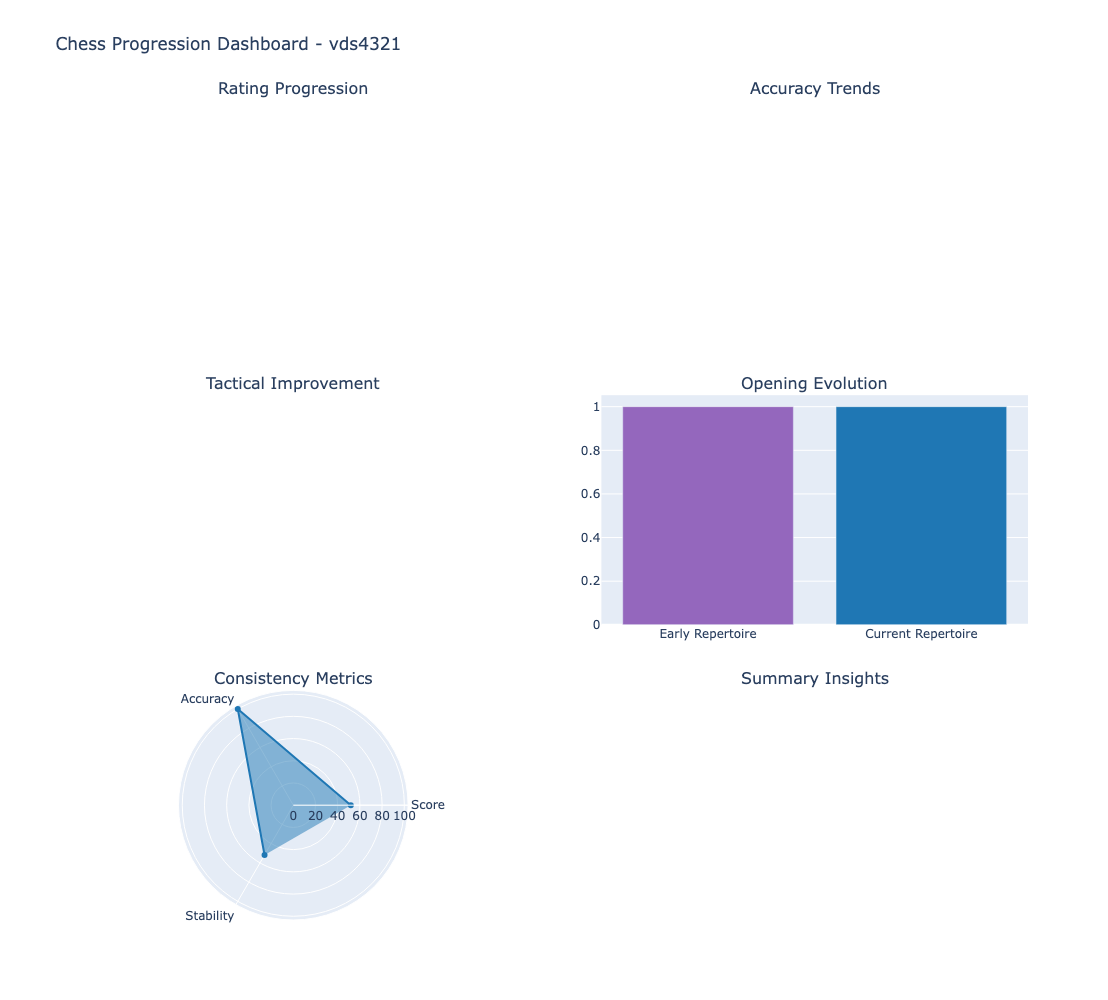

✅ Comprehensive progression dashboard created!


In [5]:
if progression_data:
    print("📊 Creating comprehensive progression dashboard...")
    
    try:
        dashboard = progression_visualizer.create_comprehensive_dashboard(progression_data)
        dashboard.update_layout(title=f"Chess Progression Dashboard - {USERNAME}")
        dashboard.show()
        
        print("✅ Comprehensive progression dashboard created!")
        
    except Exception as e:
        print(f"⚠️ Error creating dashboard: {e}")
        
else:
    print("❌ No progression data available for dashboard")

## Step 4: Rating Progression Chart

Detailed view of your rating development over time.

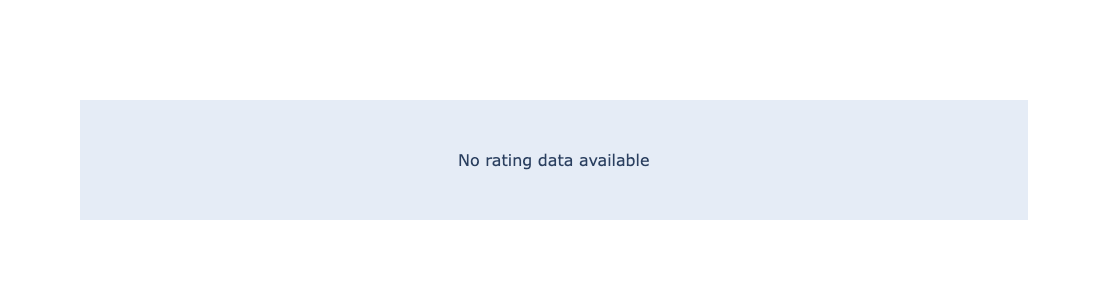

✅ Rating progression chart created!


In [6]:
if progression_data:
    try:
        rating_chart = progression_visualizer.create_rating_progression_chart(progression_data)
        if rating_chart:
            rating_chart.show()
            print("✅ Rating progression chart created!")
        else:
            print("⚠️ No rating data available for chart")
            
    except Exception as e:
        print(f"⚠️ Error creating rating chart: {e}")
        
else:
    print("❌ No progression data available")

## Step 5: Accuracy Trends

Track how your calculation accuracy has improved.

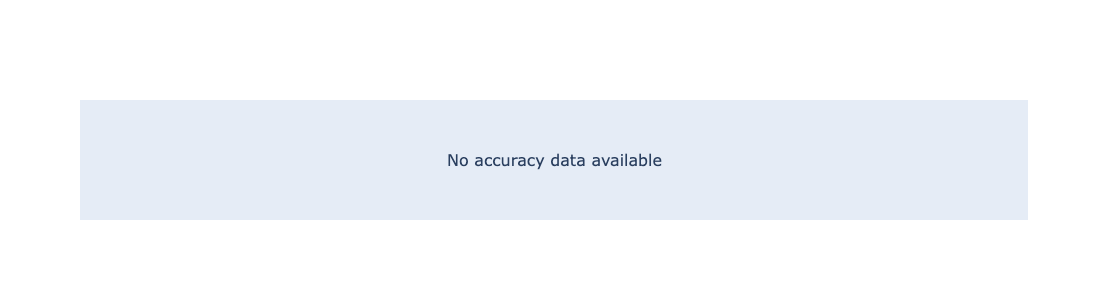

✅ Accuracy trends chart created!


In [7]:
if progression_data:
    try:
        accuracy_chart = progression_visualizer.create_accuracy_trends_chart(progression_data)
        if accuracy_chart:
            accuracy_chart.show()
            print("✅ Accuracy trends chart created!")
        else:
            print("⚠️ No accuracy data available for chart")
            
    except Exception as e:
        print(f"⚠️ Error creating accuracy chart: {e}")
        
else:
    print("❌ No progression data available")

## Step 6: Tactical Improvement

Analyze your tactical skill development.

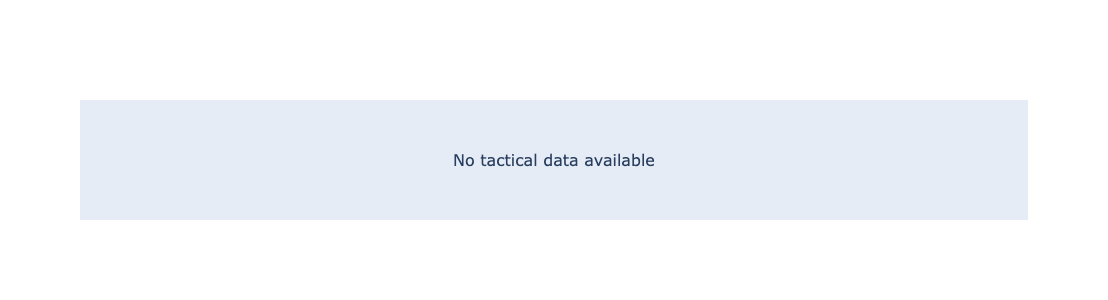

✅ Tactical improvement chart created!


In [8]:
if progression_data:
    try:
        tactical_chart = progression_visualizer.create_tactical_improvement_chart(progression_data)
        if tactical_chart:
            tactical_chart.show()
            print("✅ Tactical improvement chart created!")
        else:
            print("⚠️ No tactical data available for chart")
            
    except Exception as e:
        print(f"⚠️ Error creating tactical chart: {e}")
        
else:
    print("❌ No progression data available")

## Step 7: Opening Evolution

See how your opening repertoire has developed.

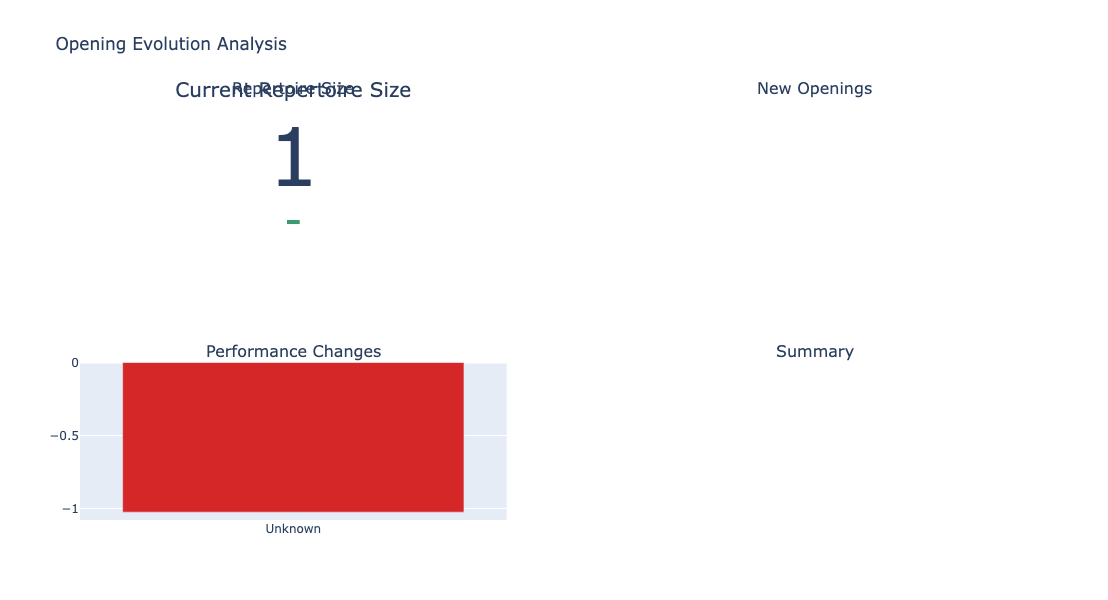

✅ Opening evolution chart created!


In [9]:
if progression_data:
    try:
        opening_chart = progression_visualizer.create_opening_evolution_chart(progression_data)
        if opening_chart:
            opening_chart.show()
            print("✅ Opening evolution chart created!")
        else:
            print("⚠️ No opening evolution data available for chart")
            
    except Exception as e:
        print(f"⚠️ Error creating opening chart: {e}")
        
else:
    print("❌ No progression data available")

## Step 8: Consistency Metrics

Analyze your performance consistency over time.

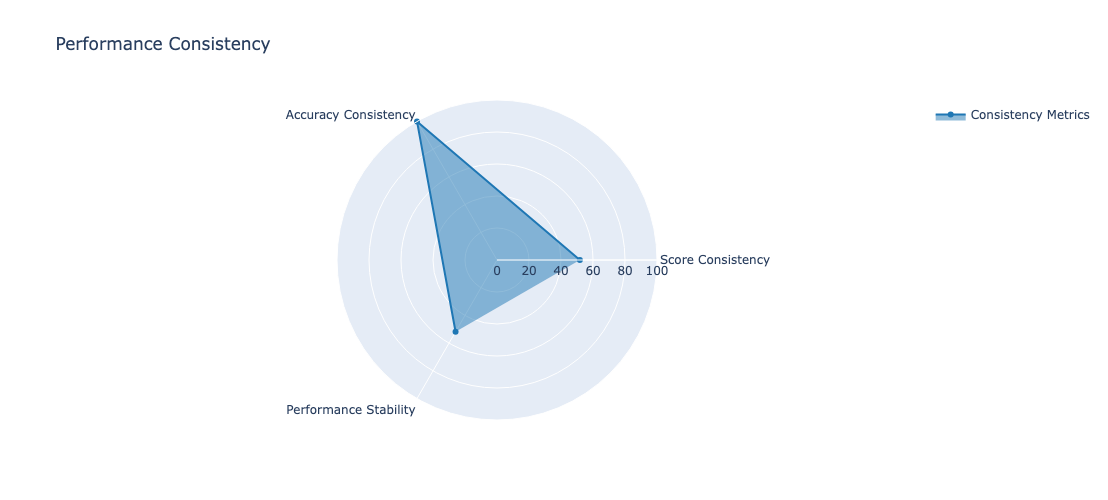

✅ Consistency metrics chart created!


In [10]:
if progression_data:
    try:
        consistency_chart = progression_visualizer.create_consistency_metrics_chart(progression_data)
        if consistency_chart:
            consistency_chart.show()
            print("✅ Consistency metrics chart created!")
        else:
            print("⚠️ No consistency data available for chart")
            
    except Exception as e:
        print(f"⚠️ Error creating consistency chart: {e}")
        
else:
    print("❌ No progression data available")

## Step 9: Improvement Velocity

Track the rate of improvement across different metrics.

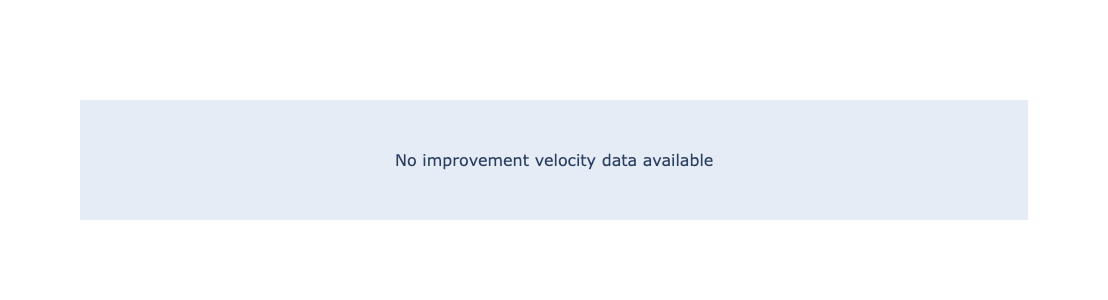

✅ Improvement velocity chart created!


In [11]:
if progression_data:
    try:
        velocity_chart = progression_visualizer.create_improvement_velocity_chart(progression_data)
        if velocity_chart:
            velocity_chart.show()
            print("✅ Improvement velocity chart created!")
        else:
            print("⚠️ No improvement velocity data available for chart")
            
    except Exception as e:
        print(f"⚠️ Error creating velocity chart: {e}")
        
else:
    print("❌ No progression data available")

## Step 10: Progression-Based Recommendations

Get personalized recommendations based on your development trends.

In [12]:
if progression_data:
    # Get progression-based recommendations
    progression_recommendations = progression_analyzer.get_progression_recommendations(progression_data)
    
    print("🎯 PROGRESSION-BASED RECOMMENDATIONS:")
    print("=" * 60)
    
    if progression_recommendations:
        for i, rec in enumerate(progression_recommendations, 1):
            priority_emoji = {"high": "🔴", "medium": "🟡", "low": "🟢"}
            type_emoji = {
                "rating_recovery": "📈",
                "accuracy_improvement": "🎯",
                "tactical_training": "⚔️",
                "opening_study": "📚",
                "consistency": "⚖️"
            }
            
            print(f"\n{i}. {priority_emoji.get(rec['priority'], '⚪')} {type_emoji.get(rec['type'], '📊')} {rec['title']}")
            print(f"   Priority: {rec['priority'].upper()}")
            print(f"   📝 {rec['description']}")
            print(f"   💡 Specific Advice: {rec['specific_advice']}")
    else:
        print("✅ Great job! Your progression shows consistent improvement across all areas.")
        print("💡 Continue your current training routine and consider challenging yourself with:")
        print("   • Playing against stronger opponents")
        print("   • Learning new opening variations")
        print("   • Solving more complex tactical puzzles")
        print("   • Studying master games in your favorite openings")
        
else:
    print("❌ No progression data available for recommendations")

🎯 PROGRESSION-BASED RECOMMENDATIONS:

1. 🟡 ⚖️ Improve Consistency
   Priority: MEDIUM
   📝 Your performance varies significantly between games.
   💡 Specific Advice: Focus on maintaining the same preparation routine and mindset for each game.


## Step 11: Detailed Progression Metrics

Explore specific progression metrics in detail.

In [13]:
if progression_data:
    print("📊 DETAILED PROGRESSION METRICS:")
    print("=" * 50)
    
    # Opponent strength progression
    opponent_data = progression_data.get('opponent_strength_progression', {})
    if opponent_data:
        print(f"\n🏆 OPPONENT STRENGTH PROGRESSION:")
        print(f"Average Opponent Rating: {opponent_data.get('avg_opponent_rating', 0)}")
        print(f"Rating Trend: {opponent_data.get('opponent_rating_trend', 0):+.1f}")
        print(f"Performance vs Stronger: {opponent_data.get('performance_vs_stronger', 0):.1f}%")
        print(f"Performance vs Similar: {opponent_data.get('performance_vs_similar', 0):.1f}%")
        print(f"Performance vs Weaker: {opponent_data.get('performance_vs_weaker', 0):.1f}%")
    
    # Game phase performance
    phase_data = progression_data.get('game_phase_performance', {})
    if phase_data:
        print(f"\n🎮 GAME PHASE PERFORMANCE:")
        for phase, metrics in phase_data.items():
            if metrics:
                print(f"{phase.capitalize()}:")
                print(f"  Performance Change: {metrics.get('performance_change', 0):+.1f}")
                print(f"  Error Reduction: {metrics.get('error_reduction', 0):+.1f}")
                print(f"  Games Analyzed: {metrics.get('games_analyzed', 0)}")
    
    # Consistency metrics
    consistency_data = progression_data.get('consistency_metrics', {})
    if consistency_data:
        print(f"\n⚖️ CONSISTENCY ANALYSIS:")
        print(f"Score Consistency: {consistency_data.get('score_consistency', 0):.1f}%")
        print(f"Accuracy Consistency: {consistency_data.get('accuracy_consistency', 0):.1f}%")
        print(f"Max Win Streak: {consistency_data.get('max_win_streak', 0)}")
        print(f"Max Loss Streak: {consistency_data.get('max_loss_streak', 0)}")
        print(f"Performance Volatility: {consistency_data.get('performance_volatility', 0):.3f}")
    
    # Playing style evolution
    style_data = progression_data.get('playing_style_evolution', {})
    if style_data:
        print(f"\n🎨 PLAYING STYLE EVOLUTION:")
        print(f"Game Length Change: {style_data.get('game_length_change', 0):+.1f} moves")
        print(f"Aggression Change: {style_data.get('aggression_change', 0):+.2f}%")
        print(f"Style Evolution: {style_data.get('style_evolution', 'unknown').replace('_', ' ').title()}")
    
    # Improvement velocity
    velocity_data = progression_data.get('improvement_velocity', {})
    if velocity_data:
        print(f"\n🚀 IMPROVEMENT VELOCITY:")
        for metric, rate in velocity_data.items():
            direction = "↗️" if rate > 0 else "↘️" if rate < 0 else "➡️"
            print(f"{metric.replace('_', ' ').title()}: {direction} {rate:+.4f} per game")

else:
    print("❌ No detailed progression data available")

📊 DETAILED PROGRESSION METRICS:

⚖️ CONSISTENCY ANALYSIS:
Score Consistency: 51.8%
Accuracy Consistency: 100.0%
Max Win Streak: 8
Max Loss Streak: 9
Performance Volatility: 0.482

🎨 PLAYING STYLE EVOLUTION:
Game Length Change: +0.0 moves
Aggression Change: +0.00%
Style Evolution: More Cautious


## Summary and Next Steps

### 🎯 Key Takeaways from Your Progression Analysis:

This analysis has shown you how your chess skills have evolved over time. Use these insights to:

1. **Focus on Identified Trends**: Build on areas showing positive development
2. **Address Declining Metrics**: Work on aspects that need improvement
3. **Maintain Strengths**: Continue practices that have led to success
4. **Set Specific Goals**: Use progression data to create targeted improvement plans

### 📅 Recommended Analysis Schedule:

- **Monthly**: Re-run this progression analysis to track development
- **Quarterly**: Deep dive into specific areas identified for improvement
- **Annually**: Compare year-over-year progression for long-term insights

### 🔄 Continuous Improvement:

Your progression data is automatically saved and can be compared over time to track long-term development trends. Keep playing, analyzing, and improving!

**Happy analyzing and improving!** 🚀♟️